# AutoRAG: Automated Optimization for Retrieval-Augmented Generation Systems




AutoRAG is an innovative framework designed to automate the optimization of Retrieval-Augmented Generation (RAG) systems. By evaluating key modules such as query expansion, retrieval, and reranking, AutoRAG aims to achieve the best performance across various tasks. The framework utilizes a modular, node-based structure that allows for the testing of different configurations efficiently. A greedy optimization approach enhances efficiency, making it suitable for diverse datasets and applications.



## Key Features of AutoRAG



- **Automated Optimization**: Streamlines the tuning process for RAG systems by automating essential components like query expansion and model selection.

- **Modular Node-Based Structure**: Organizes the optimization process into modular nodes, each responsible for distinct tasks, facilitating experimentation with various configurations.

- **Greedy Optimization Approach**: Employs a greedy algorithm to efficiently search for optimal initial pipelines, balancing performance and computational efficiency.

- **Dynamic Evaluation**: Continuously evaluates different RAG configurations to identify the most effective setup for specific datasets.



## How AutoRAG Works



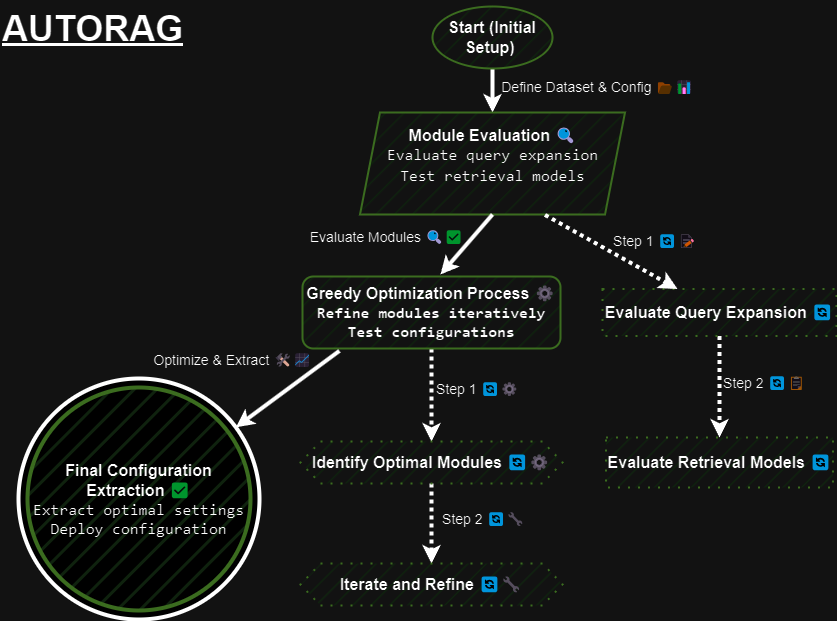

1. **Initial Setup**:
   - Users define an evaluation dataset tailored to their specific RAG application.
   - A configuration file is created to outline the parameters and modules to be tested.

2. **Module Evaluation**:
   - AutoRAG dynamically assesses various modules—such as query expansion techniques and retrieval models—using performance metrics.
   - Each module's effectiveness is evaluated based on its contribution to overall system performance.

3. **Greedy Optimization Process**:
   - A greedy algorithm identifies promising modules at each step, constructing near-optimal pipelines without exhaustive searches.
   - The framework iteratively refines its selections based on real-time feedback from evaluations.

4. **Final Configuration Extraction**:
   - Once optimal configurations are identified, users can extract these settings into a new configuration file for deployment.
   - This process ensures that users can easily implement the best-performing pipeline in their applications.



In [ ]:
!pip install pypdf2 groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.8/108.8 kB 4.2 MB/s eta 0:00:00


In [ ]:
import os
import requests
from PyPDF2 import PdfReader
from groq import Groq
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Step 0: Initialize the Groq client
client = Groq(api_key="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")

In [ ]:
# Step 1: Download and process the PDF document
pdf_url = "https://arxiv.org/pdf/1810.04805.pdf"  # Example: BERT paper on Masked Language Models
pdf_path = "BERT_paper.pdf"

In [ ]:
response = requests.get(pdf_url)
with open(pdf_path, 'wb') as pdf_file:
    pdf_file.write(response.content)

In [ ]:
reader = PdfReader(pdf_path)
text = ""
for page in reader.pages:
    text += page.extract_text()

In [ ]:
# Step 2: Define the query and create an evaluation dataset
query = "What is Unsupervised Fine-tuning Approaches?"

In [ ]:
evaluation_dataset = [
    {"query": query, "expected_output": "Information about unsupervised fine-tuning approaches in NLP"}
]

In [ ]:
# Step 3: Chunk the document for processing
chunks = [text[i:i + 1000] for i in range(0, len(text), 1000)]  # Divide document into manageable chunks
vectorizer = TfidfVectorizer()
chunk_embeddings = vectorizer.fit_transform(chunks)
query_embedding = vectorizer.transform([query])

In [ ]:
# Step 4: Retrieve relevant chunks using similarity scores
similarities = cosine_similarity(query_embedding, chunk_embeddings).flatten()
top_k = 5  # Retrieve the top 5 most relevant chunks
retrieved_chunk_indices = similarities.argsort()[-top_k:][::-1]
retrieved_chunks = [chunks[i] for i in retrieved_chunk_indices]

In [ ]:
print(f"Top retrieved chunks for query '{query}':\n")
for idx, chunk in enumerate(retrieved_chunks, start=1):
    print(f"Chunk {idx}: {chunk[:200]}...\n")  # Display first 200 characters of each chunk

Top retrieved chunks for query 'What is Unsupervised Fine-tuning Approaches?':

Chunk 1: ft representations.
When integrating contextual word embeddings
with existing task-speciﬁc architectures, ELMo
advances the state of the art for several major NLP
benchmarks (Peters et al., 2018a) inc...

Chunk 2:  are two existing strategies for apply-
ing pre-trained language representations to down-
stream tasks: feature-based andﬁne-tuning . The
feature-based approach, such as ELMo (Peters
et al., 2018a), u...

Chunk 3: -art performance on a large suite
of sentence-level andtoken-level tasks, outper-
forming many task-speciﬁc architectures.
• BERT advances the state of the art for eleven
NLP tasks. The code and pre-t...

Chunk 4: .3 Fine-tuning Procedure
For ﬁne-tuning, most model hyperparameters are
the same as in pre-training, with the exception of
the batch size, learning rate, and number of train-
ing epochs. The dropout p...

Chunk 5: RT is effective for both ﬁne-
tuning and feature-based 

In [ ]:
# Step 5: Module Evaluation
module_results = []
for chunk in retrieved_chunks:
    try:
        response = client.chat.completions.create(
            messages=[
                {"role": "system", "content": "You are an advanced assistant that evaluates information retrieval pipelines."},
                {"role": "user", "content": f"Based on the query '{query}' and the retrieved passage:\n{chunk}\nProvide a concise explanation."},
            ],
            model="llama3-8b-8192",
        )
        answer = response.choices[0].message.content
        module_results.append({"chunk": chunk[:200], "answer": answer})  # Store chunk and answer
        print(f"Generated answer: {answer}")
    except Exception as e:
        print(f"Error generating answer: {e}")

Generated answer: Based on the retrieved passage, unsupervised fine-tuning approaches in the context of natural language processing (NLP) refer to methods that utilize pre-trained word embeddings from unlabeled text data. These approaches aim to improve the performance of task-specific architectures by fine-tuning the pre-trained word embeddings using unsupervised learning techniques.

In particular, the passage mentions that the first works in this direction only pre-trained word embedding parameters from unlabeled text, as proposed by Collobert and Weston (2008). More recently, sentence or document encoders have been developed, which produce contextual token representations by leveraging unsupervised learning methods.
Generated answer: Based on the retrieved passage, unsupervised fine-tuning approaches refer to strategies for applying pre-trained language representations to downstream tasks without labeled data. There are two existing methods: feature-based and fine-tuning. The fine-

In [ ]:
# Step 6: Greedy Optimization Process
best_result = max(module_results, key=lambda x: len(x["answer"]))  # Example: Select result with longest answer
print("\nBest result based on module evaluation:")
print(f"Chunk: {best_result['chunk']}\nAnswer: {best_result['answer']}")


Best result based on module evaluation:
Chunk: -art performance on a large suite
of sentence-level andtoken-level tasks, outper-
forming many task-speciﬁc architectures.
• BERT advances the state of the art for eleven
NLP tasks. The code and pre-t
Answer: The passage discusses pre-training general language representations for natural language processing (NLP) tasks. It highlights the advancements made by BERT in outperforming task-specific architectures on various sentence-level and token-level tasks.

Regarding unsupervised fine-tuning approaches, the passage touches on "Unsupervised Feature-based Approaches" which include non-neural and neural methods to learn widely applicable representations of words. This involves pre-training word embedding vectors using left-to-right language modeling objectives, which have been shown to offer significant improvements over embeddings learned from scratch.

In summary, unsupervised fine-tuning approaches in NLP refer to methods that learn genera

In [ ]:
# Step 7: Final Configuration Extraction
final_config = {
    "query": query,
    "top_chunks": [result["chunk"] for result in module_results],
    "answers": [result["answer"] for result in module_results],
    "optimal_answer": best_result["answer"]
}

In [ ]:
print("\n--- Final Configuration Extracted ---\n")
print(final_config)


--- Final Configuration Extracted ---

{'query': 'What is Unsupervised Fine-tuning Approaches?', 'top_chunks': ['ft representations.\nWhen integrating contextual word embeddings\nwith existing task-speciﬁc architectures, ELMo\nadvances the state of the art for several major NLP\nbenchmarks (Peters et al., 2018a) inc', ' are two existing strategies for apply-\ning pre-trained language representations to down-\nstream tasks: feature-based andﬁne-tuning . The\nfeature-based approach, such as ELMo (Peters\net al., 2018a), u', '-art performance on a large suite\nof sentence-level andtoken-level tasks, outper-\nforming many task-speciﬁc architectures.\n• BERT advances the state of the art for eleven\nNLP tasks. The code and pre-t', '.3 Fine-tuning Procedure\nFor ﬁne-tuning, most model hyperparameters are\nthe same as in pre-training, with the exception of\nthe batch size, learning rate, and number of train-\ning epochs. The dropout p', 'RT is effective for both ﬁne-\ntuning and feature-base

In [ ]:
# Step 8: Save configuration for deployment
config_path = "AutoRAG_config.json"
with open(config_path, "w") as config_file:
    import json
    json.dump(final_config, config_file, indent=4)

In [ ]:
print(f"\nConfiguration saved to {config_path}")


Configuration saved to AutoRAG_config.json


## Step 1: Download and Process PDF
- The PDF is downloaded from a specified URL (e.g., research paper on unsupervised fine-tuning) and stored locally.
- The content of the PDF is extracted into a readable text format using the PyPDF2 library.

## Step 2: Define Query and Evaluation Dataset
- A query, such as "What is Unsupervised Fine-tuning Approaches?", is defined to guide the process.
- An evaluation dataset is created with the query and the expected output, which serves as a reference to assess the generated answers.

## Step 3: Chunk Document
- The document is split into manageable chunks (e.g., 1000 characters per chunk) to ensure each piece of text can be analyzed independently.
- TF-IDF Vectorization is used to convert the text chunks and the query into vector representations, enabling similarity comparison.

## Step 4: Retrieve Relevant Chunks
- The cosine similarity between the query vector and the chunk vectors is calculated.
- The top k most relevant chunks are selected based on the similarity scores, which helps focus the model on the most relevant parts of the document.

## Step 5: Module Evaluation
- The top chunks are sent to a model (via an API like Groq) to generate concise answers based on the query and chunk content.
- Each answer is evaluated, and the chunk-answer pair is stored for further analysis.

## Step 6: Greedy Optimization
- A greedy algorithm is used to select the best response. Typically, this involves choosing the answer with the most detailed or informative response based on length or relevance.
- The best result is extracted, providing the optimal chunk-answer combination.

## Step 7: Final Configuration
- The final configuration includes:
  - The query.
  - The top relevant chunks used for generating answers.
  - The answers generated by the model.
  - The best (optimal) answer selected after the optimization process.

## Step 8: Save Configuration
- The final configuration is saved in a JSON file. This file can be used for future applications or deployments, ensuring consistency in the retrieval and response generation process.

## Applications of AutoRAG



- **Open-Domain Question Answering**: Enhances systems that require accurate answers by optimizing retrieval strategies tailored to user queries.

- **Content Generation Systems**: Assists writers by providing contextually relevant information through optimized retrieval processes.

- **Knowledge Management Systems**: Improves access to information while ensuring accuracy in responses based on comprehensive data retrieval techniques.

- **Educational Tools**: Supports learning applications by providing tailored responses that leverage optimized RAG configurations for enhanced learning experiences.



## Advantages of AutoRAG



- **Enhanced Performance**: Experiments indicate that AutoRAG can outperform manually tuned RAG systems on benchmark tasks, demonstrating the effectiveness of automated optimization.

- **Accessibility**: By simplifying the tuning process, AutoRAG makes RAG systems more accessible to researchers and practitioners, encouraging broader experimentation and adoption.

- **Scalability**: The modular design allows for easy scaling as new techniques or datasets emerge without extensive reconfiguration.

- **Efficiency across Datasets**: The ability to optimize configurations based on specific datasets enhances performance and relevance in diverse applications.



## Limitations of AutoRAG



- **Complexity in Configuration**: While modularity offers flexibility, managing multiple nodes and their interactions may introduce complexity in system design.

- **Dependence on Module Quality**: The overall effectiveness of AutoRAG relies on the quality of the individual modules; suboptimal modules can hinder performance.

- **Resource Requirements**: The evaluation and optimization processes may require significant computational resources, particularly when exploring extensive configurations.



## Conclusion



AutoRAG represents a significant advancement in the automation of Retrieval-Augmented Generation systems. By streamlining the optimization process through a modular approach and greedy algorithms, it enhances performance while making RAG systems more accessible and efficient. As AI continues to evolve, frameworks like AutoRAG will play a crucial role in refining how language models integrate external knowledge, ultimately leading to more reliable and effective applications.



Having explored AutoRAG, we will now move on to CORAG.